Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predicted price direction for the next 60 days:
2025-02-25    Down
2025-02-26    Down
2025-02-27    Down
2025-02-28    Down
2025-03-01    Down
2025-03-02    Down
2025-03-03    Down
2025-03-04    Down
2025-03-05    Down
2025-03-06    Down
2025-03-07    Down
2025-03-08    Down
2025-03-09    Down
2025-03-10    Down
2025-03-11    Down
2025-03-12    Down
2025-03-13    Down
2025-03-14    Down
2025-03-15    Down
2025-03-16    Down
2025-03-17    Down
2025-03-18    Down
2025-03-19    Down
2025-03-20    Down
2025-03-21    Down
2025-03-22    Down
2025-03-23    Down
2025-03-24    Down
2025-03-25    Down
2025-03-26    Down
2025-03-27    Down
2025-03-28    Down
2025-03-29    Down
2025-03-30    Down
2025-03-31    Down
2025-04-01    Down
2025-04-02    Down
2025-04-03    Down
2025-04-04    Down
2025-04-05    Down
2025-04-06    Down
2025-04-07    Down
2025-04-08    Down
2025-0

<ipython-input-11-18bb933a9137>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['signal'][short_window:] = np.where(data['sma20'][short_window:] > data['sma50'][short_window:], 1, -1)
<ipython-input-11-18bb933a9137>:26: SettingWithCop

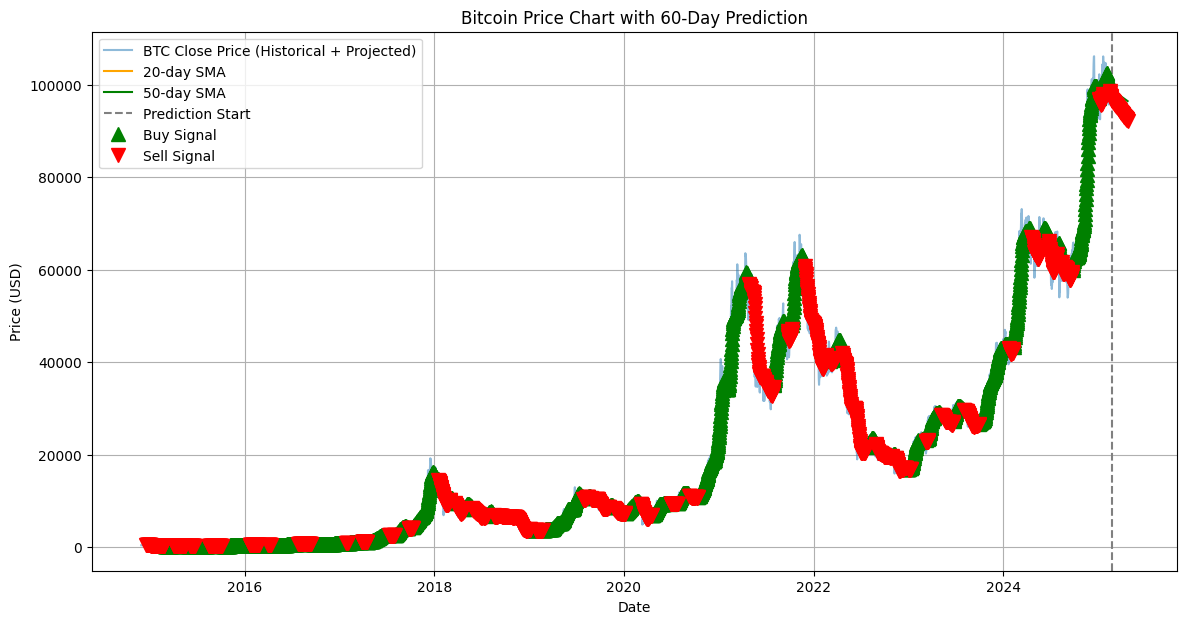

Last 5 historical rows and first 5 predicted rows:
                   close     sma20     sma50  signal
2025-02-20  98337.000000  97278.25  99026.96      -1
2025-02-21  96131.000000  97052.90  99011.44      -1
2025-02-22  96572.000000  96997.75  98980.22      -1
2025-02-23  96262.000000  96738.00  98941.28      -1
2025-02-24  96303.000000  96663.85  98900.80      -1
2025-02-25  97559.590553  96589.70  98860.32      -1
2025-02-26  97384.616880  96515.55  98819.84      -1
2025-02-27  97599.079336  96441.40  98779.36      -1
2025-02-28  97542.474792  96367.25  98738.88      -1
2025-03-01  97343.042113  96293.10  98698.40      -1


In [11]:
# Mount Google Drive (run this first in Colab)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Bitcoin dataset from Google Drive
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bitcoin_pred/Bitstamp_BTCUSD_d.csv', skiprows=1)  # Skip header row
data['date'] = pd.to_datetime(data['date'])  # Convert lowercase 'date' to datetime
data = data.sort_values('date')  # Ensure chronological order
data.set_index('date', inplace=True)  # Set 'date' as index

# Focus on the 'close' price
prices = data['close']

# Step 2: Calculate moving averages (short and long-term)
short_window = 20  # 20-day SMA
long_window = 50   # 50-day SMA
data['sma20'] = prices.rolling(window=short_window).mean()
data['sma50'] = prices.rolling(window=long_window).mean()

# Step 3: Generate signals based on SMA crossover
data['signal'] = 0  # 0 = no action
data['signal'][short_window:] = np.where(data['sma20'][short_window:] > data['sma50'][short_window:], 1, -1)

# Step 4: Extend the dataset for future prediction (60 days)
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=61, freq='D')[1:]  # 60 days ahead, excluding start
future_data = pd.DataFrame(index=future_dates)

# Estimate future SMA trends based on recent momentum
last_sma20 = data['sma20'].iloc[-1]
last_sma50 = data['sma50'].iloc[-1]
sma20_slope = (data['sma20'].iloc[-1] - data['sma20'].iloc[-2])  # Daily change in sma20
sma50_slope = (data['sma50'].iloc[-1] - data['sma50'].iloc[-2])  # Daily change in sma50

# Project future SMA values
future_data['sma20'] = [last_sma20 + sma20_slope * i for i in range(1, 61)]
future_data['sma50'] = [last_sma50 + sma50_slope * i for i in range(1, 61)]

# Simulated future close prices (average of sma20 and sma50 with some noise)
future_data['close'] = (future_data['sma20'] + future_data['sma50']) / 2 + np.random.normal(0, prices.std() * 0.01, 60)

# Combine historical and future data
combined_data = pd.concat([data[['close', 'sma20', 'sma50']], future_data])

# Step 5: Predict direction for the next 60 days
combined_data['signal'] = 0
combined_data['signal'][short_window:] = np.where(combined_data['sma20'][short_window:] > combined_data['sma50'][short_window:], 1, -1)
future_prediction = combined_data['signal'].tail(60)
print("Predicted price direction for the next 60 days:")
print(future_prediction.apply(lambda x: "Up" if x == 1 else "Down"))

# Step 6: Visualize the chart with historical and future data
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['close'], label='BTC Close Price (Historical + Projected)', alpha=0.5)
plt.plot(combined_data.index, combined_data['sma20'], label=f'{short_window}-day SMA', color='orange')
plt.plot(combined_data.index, combined_data['sma50'], label=f'{long_window}-day SMA', color='green')

# Plot vertical line to separate historical and future
plt.axvline(x=last_date, color='gray', linestyle='--', label='Prediction Start')

# Plot buy signals
plt.plot(combined_data[combined_data['signal'] == 1].index,
         combined_data['sma20'][combined_data['signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(combined_data[combined_data['signal'] == -1].index,
         combined_data['sma20'][combined_data['signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Bitcoin Price Chart with 60-Day Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Show the last few historical and first few future rows
print("Last 5 historical rows and first 5 predicted rows:")
print(combined_data[['close', 'sma20', 'sma50', 'signal']].tail(65).head(10))